In [403]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [404]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [406]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [407]:
df.duplicated().sum()

0

## Visualization

In [408]:
numerical_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

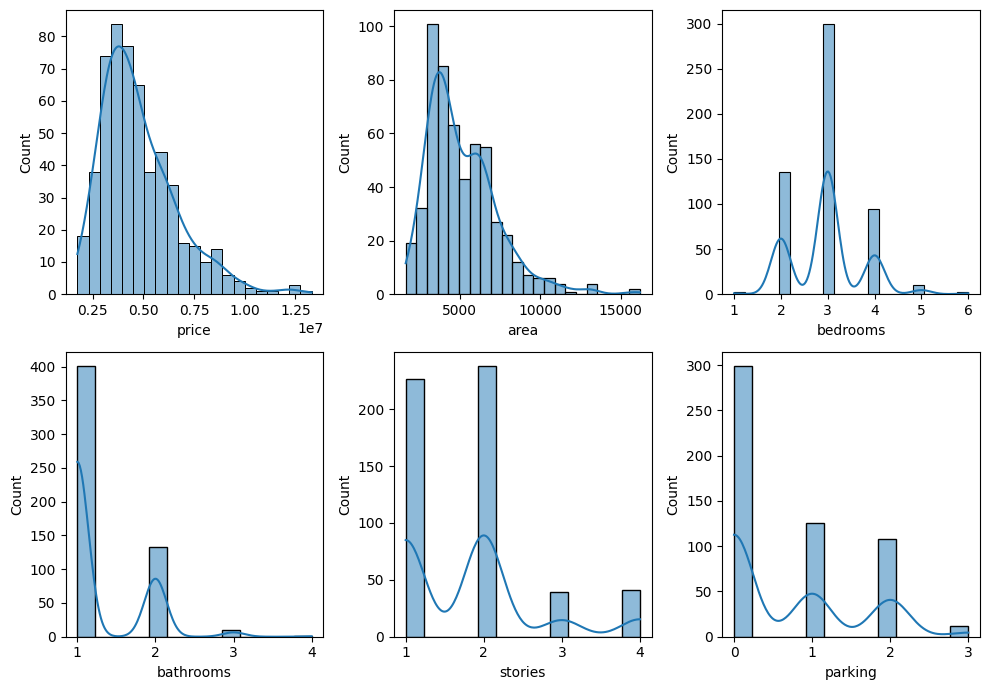

In [409]:
idx = 1
plt.figure(figsize=(10,7))
for col in df[numerical_cols]:
    plt.subplot(2,3, idx)
    sns.histplot(df[col], kde=True)
    idx += 1
    plt.tight_layout()

In [410]:
categorical_cols = df.drop(numerical_cols, axis=1).columns

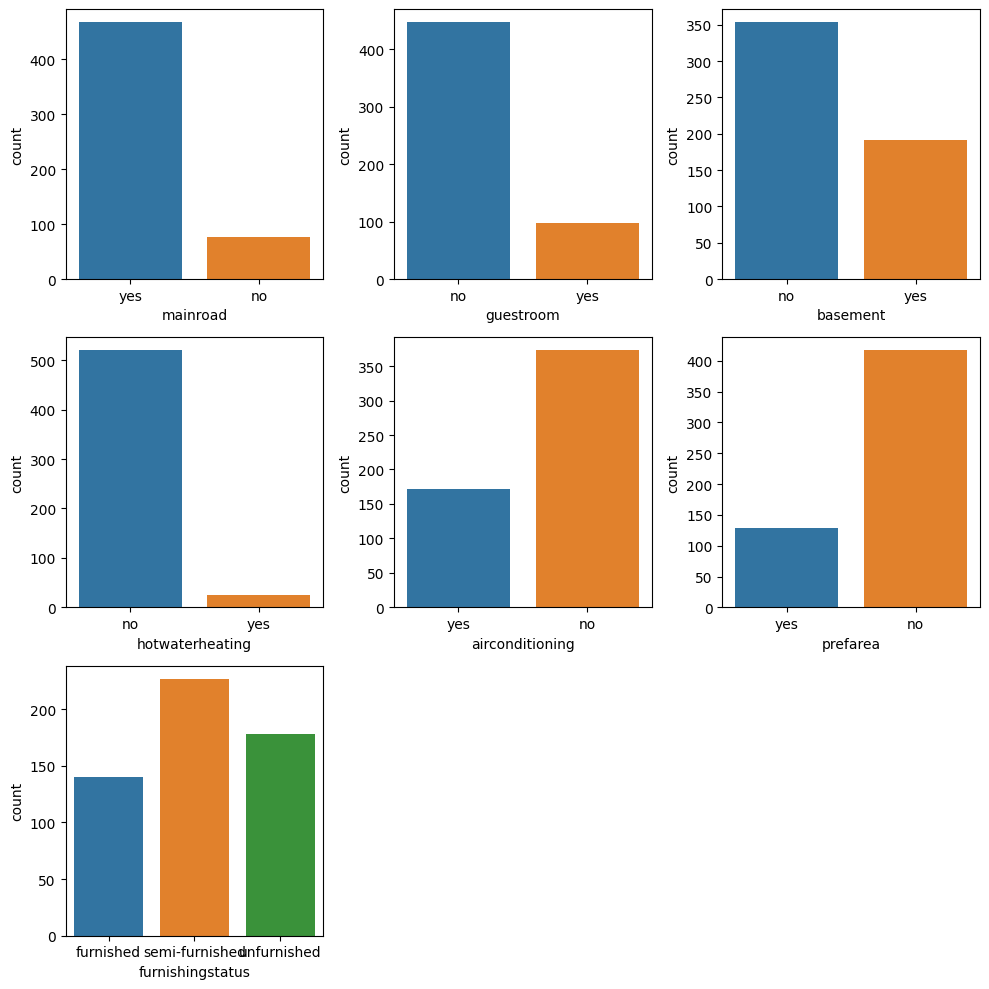

In [411]:
idx = 1
plt.figure(figsize=(10,10))
for col in df[categorical_cols]:
    plt.subplot(3, 3, idx)
    idx += 1
    sns.countplot(data=df, x=col)
    plt.tight_layout()

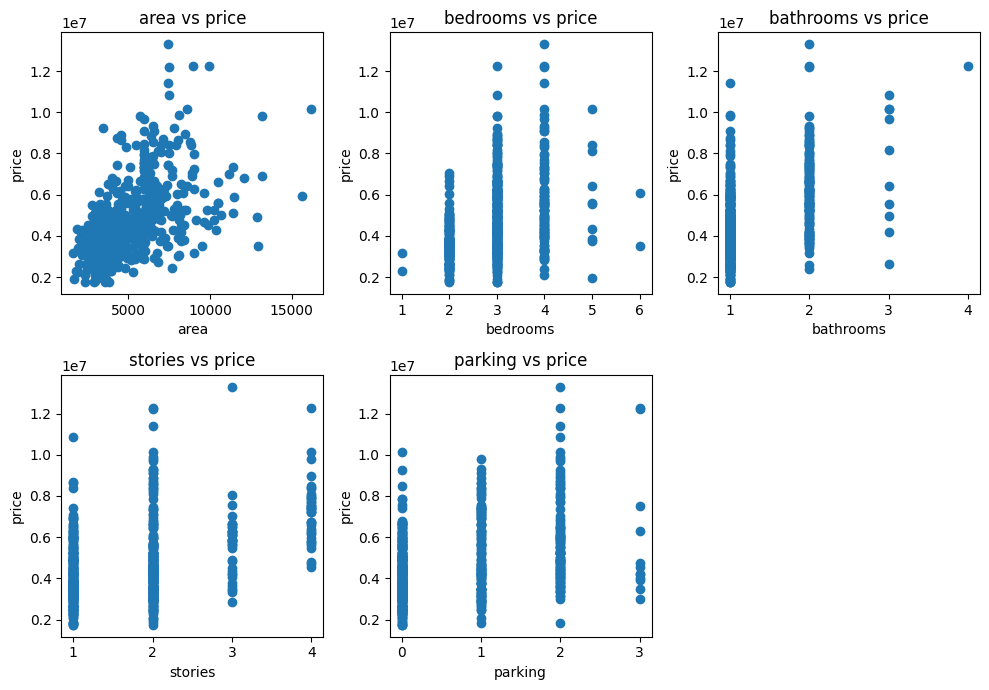

In [412]:
idx = 1
plt.figure(figsize=(10,7))
for col in df[numerical_cols[1:]]:
    plt.subplot(2,3, idx)
    plt.scatter(df[col], df['price'])
    plt.title(f"{col} vs price")
    plt.ylabel("price")
    plt.xlabel(col)
    idx += 1
    plt.tight_layout()

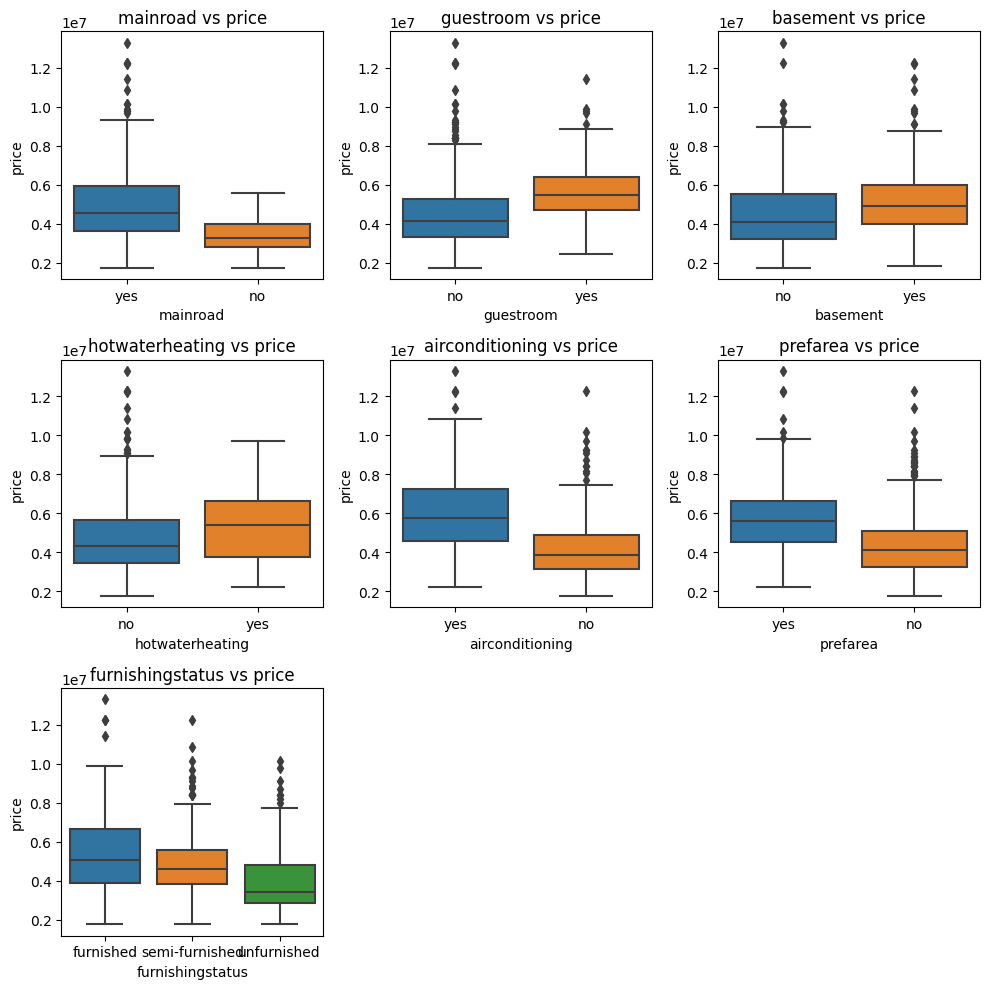

In [413]:
idx = 1
plt.figure(figsize=(10,10))
for col in df[categorical_cols]:
    plt.subplot(3, 3, idx)
    idx += 1
    sns.boxplot(data=df, x=col, y='price')
    plt.title(f"{col} vs price")
    plt.xlabel(col)
    plt.ylabel("price")
    plt.tight_layout()

## Encoding Categorical Variables

In [414]:
for col in categorical_cols:
    if col == 'furnishingstatus':
        df[col] = df[col].map({"furnished": 2, "semi-furnished": 1, "unfurnished": 0})
    else:
        df[col] = df[col].map({"yes": 1, "no": 0})

## Feature Engineering

In [415]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [416]:
df["amenity_count"] = df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]].sum(axis=1)

In [417]:
df['area_bedrooms'] = df['area'] * df['bedrooms']
df['area_bathrooms'] = df['area'] * df['bathrooms']
df["area_ac"] = df["area"] * df["airconditioning"]
df['area_furnishingstatus'] = df['area'] * df['furnishingstatus']

In [418]:
df["area_log"] = np.log(df["area"])

### Correlation Matrix

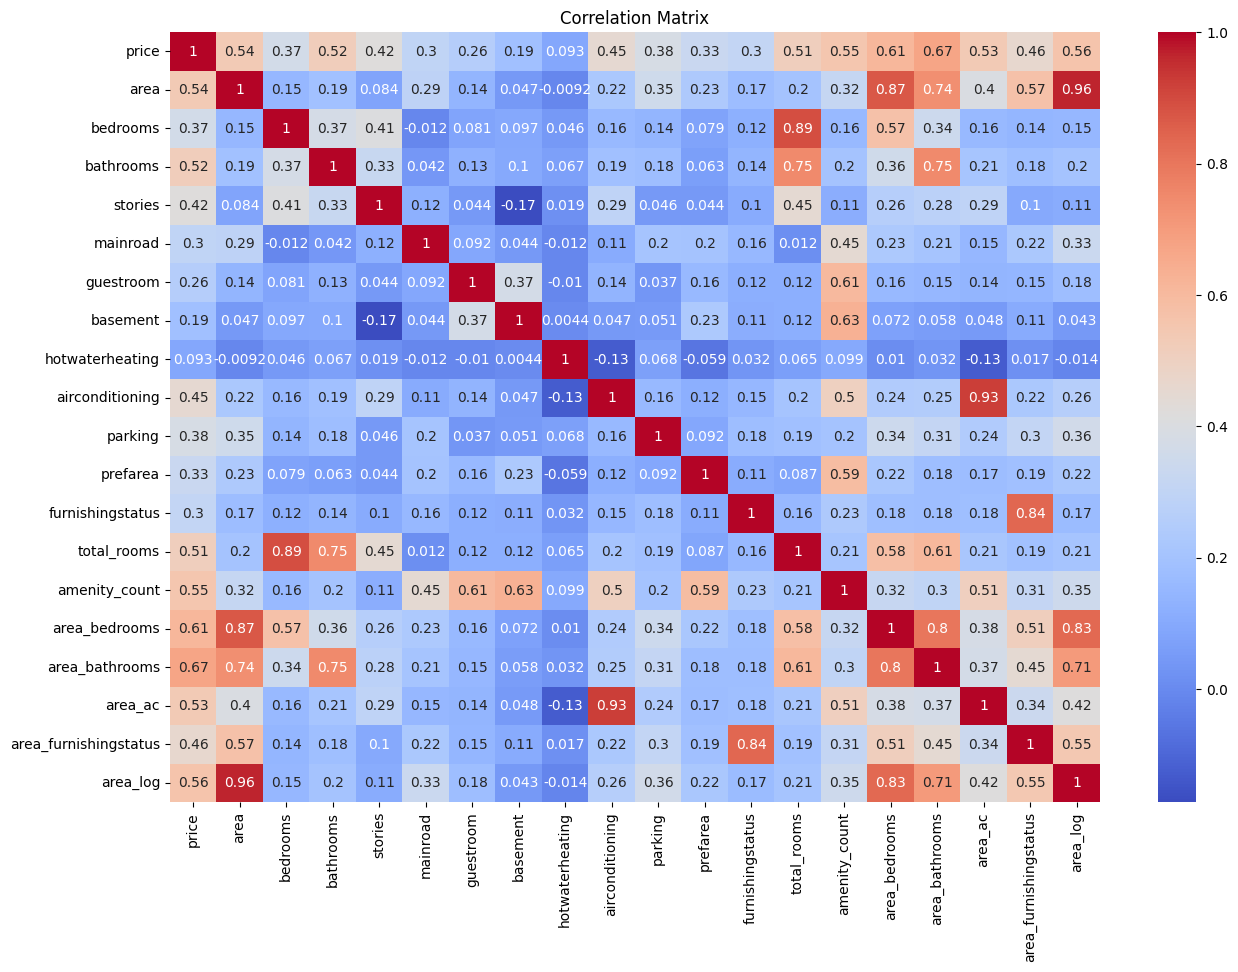

In [419]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning

In [420]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [421]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [422]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [423]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [424]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R² score: {train_score}")
print(f"Test R² score: {test_score}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Train R² score: 0.702334824804967
Test R² score: 0.6664913282473555
RMSE: 1031925.825313692


In [425]:
cv_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring="r2")
print(f"Average CV R²: {cv_r2.mean()}")

Average CV R²: 0.6514808435341389
